# Import Libraries

In [204]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# Import dataset

In [205]:
path = 'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011)/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011).csv'
pollution = pd.read_csv(path)
pollution.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        331 non-null    object 
 1   Year                                                          331 non-null    int64  
 2   Smoke (Fouquet and DPCC (2011))                               301 non-null    float64
 3   Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))  331 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.5+ KB


In [206]:
pollution.isnull().sum()

Entity                                                           0
Year                                                             0
Smoke (Fouquet and DPCC (2011))                                 30
Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))     0
dtype: int64

In [207]:
pollution1 = pollution.copy()
pollution1

,Entity,Year,Smoke (Fouquet and DPCC (2011)),Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))
0,Delhi,1997,NaN,363.0
1,Delhi,1998,NaN,378.0
2,Delhi,1999,NaN,375.0
3,Delhi,2000,NaN,431.0
4,Delhi,2001,NaN,382.0
...,...,...,...,...
326,London,2012,NaN,17.0
327,London,2013,NaN,17.0
328,London,2014,NaN,17.0
329,London,2015,NaN,15.0


In [208]:
pollution1 = pollution1.rename(columns = {'Smoke (Fouquet and DPCC (2011))': 'Smoke', 'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))': 'SPM', 'Entity':'City'})
pollution1

,City,Year,Smoke,SPM
0,Delhi,1997,NaN,363.0
1,Delhi,1998,NaN,378.0
2,Delhi,1999,NaN,375.0
3,Delhi,2000,NaN,431.0
4,Delhi,2001,NaN,382.0
...,...,...,...,...
326,London,2012,NaN,17.0
327,London,2013,NaN,17.0
328,London,2014,NaN,17.0
329,London,2015,NaN,15.0


In [209]:
pollution1['Year'] = pollution1['Year'].apply(lambda x: datetime.strptime(str(x),'%Y'))
pollution1 = pollution1.pivot(index = 'Year', columns = 'City', values = 'SPM')


In [210]:
pollution1

City,Delhi,London
Year,,
1700-01-01,NaN,259.740260
1701-01-01,NaN,262.337662
1702-01-01,NaN,264.935065
1703-01-01,NaN,267.532467
1704-01-01,NaN,270.129870
...,...,...
2012-01-01,NaN,17.000000
2013-01-01,NaN,17.000000
2014-01-01,NaN,17.000000


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

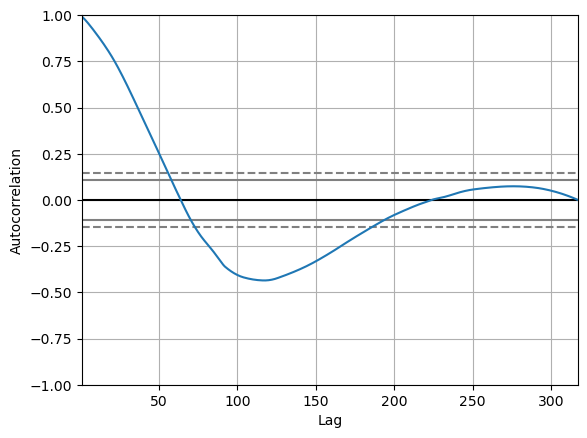

In [211]:
pd.plotting.autocorrelation_plot(pollution1['London'])


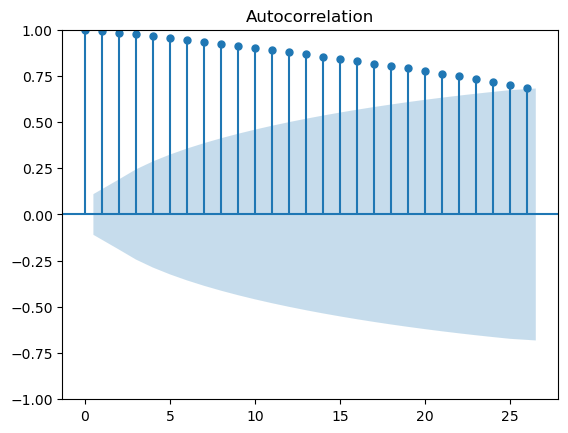

In [212]:
influence = plot_acf(pollution1['London'])

In [216]:
pollution1

City,Delhi,London
Year,,
1700-01-01,NaN,259.740260
1701-01-01,NaN,262.337662
1702-01-01,NaN,264.935065
1703-01-01,NaN,267.532467
1704-01-01,NaN,270.129870
...,...,...
2012-01-01,NaN,17.000000
2013-01-01,NaN,17.000000
2014-01-01,NaN,17.000000


<Figure size 1200x600 with 0 Axes>

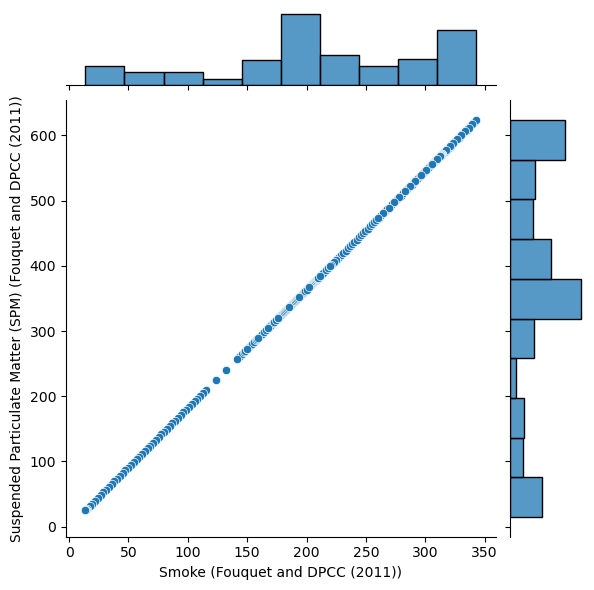

In [219]:
plt.figure(figsize = (12,6))
sns.jointplot(data = pollution, x = 'Smoke (Fouquet and DPCC (2011))', y = 'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))', edgecolor = 'white')

In [ ]:
# import the dataset
path1 = 'https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/main/chapter2/monthly_csv.csv'
month = pd.read_csv(path1)
month.head()
month.info()
month.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  3288 non-null   object 
 1   Date    3288 non-null   object 
 2   Mean    3288 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.2+ KB


Source    0
Date      0
Mean      0
dtype: int64

In [ ]:
month.Date = pd.to_datetime(month.Date)
month


,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292
...,...,...,...
3283,GISTEMP,1880-03-06,-0.1800
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3286,GCAG,1880-01-06,0.0009


In [ ]:
# group the month according to source
month1 = month.copy() 
month1 = month1.pivot(index = 'Date', columns = 'Source', values = 'Mean')
month1

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14
...,...,...
2016-08-06,0.8998,0.98
2016-09-06,0.8767,0.87
2016-10-06,0.7292,0.89


In [ ]:
from numpy import polyfit

In [ ]:
def fit(X, y, degree = 3):
  cof = polyfit(X, y, degree)
  trendpoly = np.poly1d(cof)
  return trendpoly(X)

In [ ]:
def get_trend(s, degree = 3):
  X = list(range(len(s)))
  trend = fit(X, s.values, degree = 3)
  return pd.Series(data = trend, index = s.index) 

In [ ]:
def geet_season(s, yearly_period =4, degree = 3):
  X = [i % (365 / 4 )for i in range(len(s))]
  season = fit(X, s.values, degree)
  return pd.Series(data = season, index = s.index)

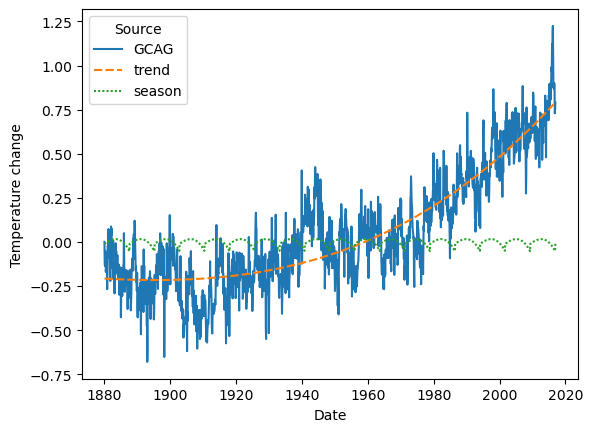

In [ ]:
month1['trend'] = get_trend(month1['GCAG'])
# season performance 
month1['season'] = geet_season(month1['GCAG'] - month1['trend'])
# plot each trend and trend performance for each season
month1
sns.lineplot(data = month1[['GCAG', 'trend', 'season']])
plt.ylabel('Temperature change')
plt.show()

In [221]:
from matplotlib.dates import  DateFormatter
from sklearn.datasets import fetch_openml

In [222]:
eeg = fetch_openml(data_id = 1471, as_frame = True)

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [224]:
eeg

{'data':             V1       V2       V3       V4       V5       V6       V7       V8  \
 0      4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
 1      4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
 2      4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
 3      4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
 4      4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   
 ...        ...      ...      ...      ...      ...      ...      ...      ...   
 14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
 14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
 14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
 14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
 14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.46   
 
      

In [229]:
increment = 117/ len(eeg['data'])

14980

In [234]:
index = np.linspace(start = 0, stop = increment * len(eeg['data']), num = len(eeg['data']))
index

array([0.00000000e+00, 7.81093531e-03, 1.56218706e-02, ...,
       1.16984378e+02, 1.16992189e+02, 1.17000000e+02])

In [233]:
index1 = np.linspace(start = 0, stop = 117, num = len(eeg['data']))
index1

array([0.00000000e+00, 7.81093531e-03, 1.56218706e-02, ...,
       1.16984378e+02, 1.16992189e+02, 1.17000000e+02])

In [240]:
ts_index = pd.to_datetime(index, unit = 's')

In [394]:
V1 = pd.Series(data = eeg['data']['V1'].values, index = ts_index)
V1 = V1.to_frame()
V1.columns = ['values']
V1

,values
1970-01-01 00:00:00.000000000,4329.23
1970-01-01 00:00:00.007810935,4324.62
1970-01-01 00:00:00.015621870,4327.69
1970-01-01 00:00:00.023432805,4328.72
1970-01-01 00:00:00.031243741,4326.15
...,...
1970-01-01 00:01:56.968756258,4281.03
1970-01-01 00:01:56.976567194,4276.92
1970-01-01 00:01:56.984378129,4277.44
1970-01-01 00:01:56.992189064,4284.62


In [395]:
slicing = (V1.index >= '1970-01-01 00:00:07') & (V1.index <= '1970-01-01 00:01:20.03345551')
V1[slicing]

,values
1970-01-01 00:00:07.006408972,4257.44
1970-01-01 00:00:07.014219907,7222.05
1970-01-01 00:00:07.022030843,4253.85
1970-01-01 00:00:07.029841778,4254.36
1970-01-01 00:00:07.037652713,4263.08
...,...
1970-01-01 00:01:19.999599439,4294.87
1970-01-01 00:01:20.007410374,4293.85
1970-01-01 00:01:20.015221309,4295.90
1970-01-01 00:01:20.023032245,4291.28


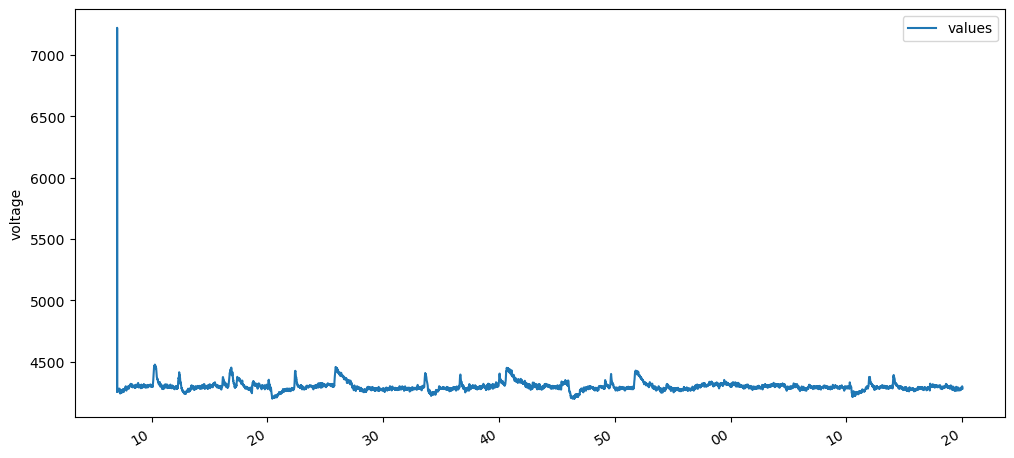

In [396]:
date_formater = DateFormatter('%S')
ax = V1[slicing].plot(figsize= (12,6))
ax.xaxis.set_major_formatter(date_formater)
plt.ylabel('voltage')
plt.show()

In [398]:
# generate time series data for plotting - freq = 1s
df1 = V1[slicing].resample('1s').mean()
x1 = df1.index
y1 = df1.values

# generate time series data for plotting - freq = 2s
df2 = V1[slicing].resample('2s').mean()
x2 = df2.index
y2 = df2.values

# generate time series data for plotting - freq = 5s
df3 = V1[slicing].resample('5s').mean()
x3 = df3.index
y3 = df3.values

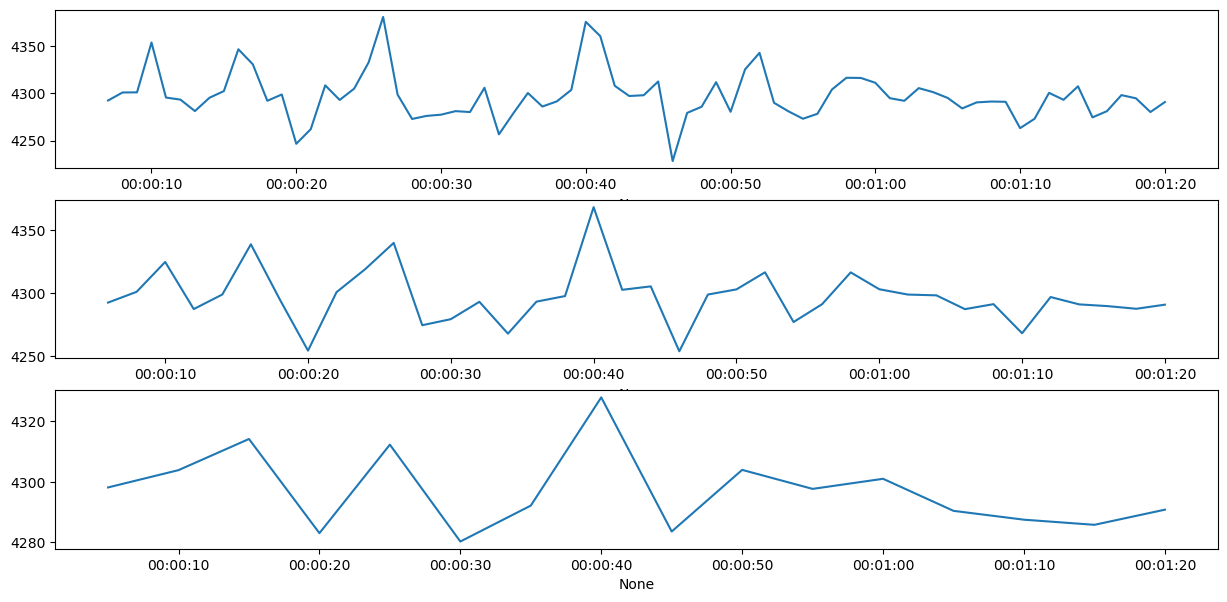

In [385]:
# resize plot
fig, axes = plt.subplots(figsize = (15,7))

plt.clf()
plt.subplot(3, 1, 1)
p1 = sns.lineplot(x = x1, y = y1)

plt.subplot(3, 1, 2)
p2 = sns.lineplot(x = x2, y = y2)

plt.subplot(3, 1, 3)
p3 = sns.lineplot(x = x3, y = y3)

plt.show()

In [496]:
a = pd.concat([df1, df2, df3], axis = 0, keys = ['1s','2s','5s'])
a = a.reset_index()
a = a.rename(columns = {
  'level_0':'frequency', 
  'level_1':'timestamp'
})
a

,frequency,timestamp,values
0,1s,1970-01-01 00:00:07,4292.428125
1,1s,1970-01-01 00:00:08,4300.901172
2,1s,1970-01-01 00:00:09,4301.025781
3,1s,1970-01-01 00:00:10,4353.753828
4,1s,1970-01-01 00:00:11,4295.536797
...,...,...,...
123,5s,1970-01-01 00:01:00,4300.969531
124,5s,1970-01-01 00:01:05,4290.386328
125,5s,1970-01-01 00:01:10,4287.466391
126,5s,1970-01-01 00:01:15,4285.774680


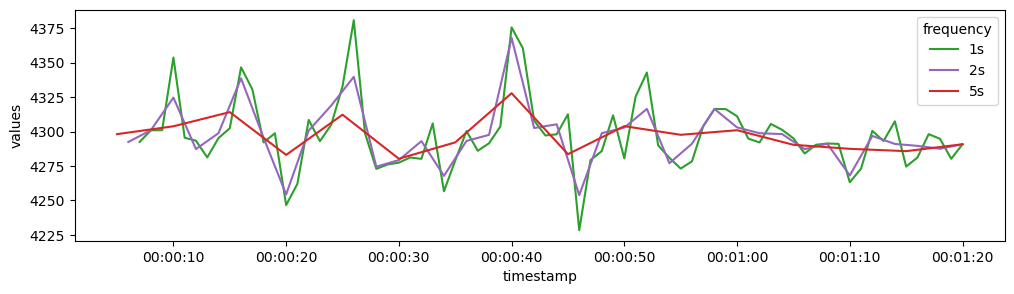

In [498]:
fig, axes = plt.subplots(figsize = (12, 3))
sns.lineplot(data = a, x = 'timestamp', y = 'values', hue = 'frequency', palette = ['C2', 'C4', 'C3'])
plt.show()